In [26]:
COLAB=False #if running on https://colab.research.google.com/notebooks/welcome.ipynb

# Imports

In [27]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

In [28]:
if COLAB == True :
    !pip install PyDrive

    if os.path.exists('./fair-universe/'):
        !rm -r fair-universe
    if os.path.exists('./input_data/'):
        !rm -r input_data
    !git clone https://github.com/Ragansu/fair-universe.git fair-universe
    !ls
    !pwd

    import os
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    download = drive.CreateFile({'id': '1sJzBVEJQcQ76VKjFCGC8KBT0lVHAGKIl'})
    download.GetContentFile("reference_data.csv")
    !cp reference_data.csv fair-universe/Competition_Bundle_HEP/

    root_dir = (path[0])+'/fair-universe/Competition_Bundle_HEP/'

else :
    module_dir= (path[0])
    root_dir = os.path.dirname(module_dir)



## Directories

In [29]:
# Input data directory to read training data from

# Input data directory
input_dir = os.path.join(root_dir, 'input_data')

# Output data directory to write predictions to
output_dir = os.path.join(root_dir, 'sample_result_submission')

# Program directory
program_dir = os.path.join(root_dir, 'ingestion_program')

# Directory to read submitted submissions from
model_dir = os.path.join(root_dir, 'sample_code_submission')

# Directory to read visualizations from
visualizer_dir = os.path.join(root_dir, 'visualize')

# Score directory to read scoring code from
score_dir = os.path.join(root_dir, 'scoring_program')


In [30]:
# model_dir = '../sample_code_submission/'
# result_dir = '../sample_result_submission/' 
# problem_dir = '../ingestion_program/'  
# score_dir = '../scoring_program/'
# visualizer_dir = '../visualize/'

### Add directories to path

In [31]:
path.append(model_dir) 
path.append(program_dir)
path.append(score_dir)
path.append(root_dir)
path.append(visualizer_dir)

print(path)


['x:\\Fair Universe 2023\\fair-universe\\Competition_Bundle_HEP\\Starting_kit', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib', 'C:\\Users\\THINKPAD\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0', '', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packa

**Imports**

In [32]:
# from data_loader import get_settings_from_json

from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [33]:
# Init Ingestion
DataGenerator()

ingestion = Ingestion()

# Start timer
ingestion.start_timer()


PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_electron_flag
PRI_muon_flag
PRI_had_pt
PRI_had_eta
PRI_had_phi
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_n_jets
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
PRI_met
PRI_met_phi
DER_mass_transverse_lep_had
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_lep_had
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_had
DER_mass_transverse_met_lep
DER_deltar_had_lep
DER_met_phi_centrality
DER_lep_eta_centrality
[*] --- sum of weights : 2870527.862053714
[*] --- sum of signal : 9666.051853714003
[*] --- sum of background : 2860861.8102
sum of signal 9666.051853714003
sum of background 2860861.8102
Tau energy rescaling : 1.0
mu =  1.065
Shape of test set :  (7245, 32)
sum of signal 10294.345224205412
sum of background 2860861.810200001
sum of weights 2871156.155424206
mu =  1.0650000000000472
Tau energy rescaling : 1.0
mu =  1.6
Shape of test set :  (7245, 32)
sum of

In [34]:
# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [35]:
Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [36]:
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


PRI_lep_pt  PRI_lep_eta  PRI_lep_phi  PRI_electron_flag  PRI_muon_flag  \
0     30.0957    -0.417153    -0.262128                  0              1   
1     24.2985     1.935920     3.011220                  0              1   
2     25.2433    -1.109760    -2.211570                  0              1   
3     24.9013     1.158930    -2.742440                  0              1   
4     28.7685    -0.565715    -2.365500                  1              0   

   PRI_had_pt  PRI_had_eta  PRI_had_phi  PRI_jet_leading_pt  \
0     48.3312     1.139070     2.765210             48.3312   
1     40.6593     1.258240    -0.454745             40.6593   
2     38.6612     1.004530     1.559050             38.6612   
3     50.9163     0.075382    -2.387900            164.3330   
4     33.9085    -1.226920     0.732316             33.9085   

   PRI_jet_leading_eta  ...  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0             1.139070  ...         -7.000000            -7.000000   
1             1.258240  ...        164.525275             5.759518   
2             1.004530  ...         64.154708             2.678871   
3            -0.084925  ...        176.085870            -0.006402   
4            -1.226920  ...         -7.000000            -7.000000   

   DER_deltar_lep_had  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_had  \
0             3.40391   66.729434     78.4269              0.622697   
1             2.89758   83.968384    130.2539              0.597612   
2             3.28379   79.613080    159.2221              0.652936   
3             1.14008  108.536705    337.0316              0.489063   
4             3.16759   40.375348     62.6770              0.848416   

   DER_mass_transverse_met_lep  DER_deltar_had_lep  DER_met_phi_centrality  \
0                    17.619867            3.403910                1.414140   
1                    39.224393            2.897582                1.194808   
2                    12.896232            3.283779               -1.367428   
3                     0.855717            1.140077                0.956486   
4                    23.383802            3.167595               -1.414210   

   DER_lep_eta_centrality  
0           -7.000000e+00  
1            7.046442e-01  
2            3.512990e-06  
3            2.863306e-92  
4           -7.000000e+00  

[5 rows x 32 columns]

[*] --- Description of all features


PRI_lep_pt    PRI_lep_eta    PRI_lep_phi  PRI_electron_flag  \
count  169054.000000  169054.000000  169054.000000      169054.000000   
mean       33.469123       0.001861      -0.004141           0.448437   
std        17.818724       1.191101       1.811950           0.497336   
min        20.000100      -2.499920      -3.141570           0.000000   
25%        23.818025      -0.905241      -1.573078           0.000000   
50%        28.649850      -0.002294      -0.005309           0.000000   
75%        36.390250       0.906044       1.562573           1.000000   
max       576.872000       2.499990       3.141540           1.000000   

       PRI_muon_flag     PRI_had_pt    PRI_had_eta    PRI_had_phi  \
count  169054.000000  169054.000000  169054.000000  169054.000000   
mean        0.551563      44.386967       0.005129      -0.001904   
std         0.497336      23.681359       1.218129       1.816499   
min         0.000000      22.917500      -2.663630      -3.141570   
25%         0.000000      30.994250      -0.937050      -1.583557   
50%         1.000000      38.683000       0.015759       0.005713   
75%         1.000000      49.374000       0.942176       1.571093   
max         1.000000     599.825000       2.682640       3.141550   

       PRI_jet_leading_pt  PRI_jet_leading_eta  ...  DER_mass_jet_jet  \
count       169054.000000        169054.000000  ...     169054.000000   
mean            67.833292             0.006427  ...        144.073604   
std             59.294330             1.559283  ...        275.329907   
min             22.939800            -4.890660  ...         -7.000000   
25%             35.459225            -1.127105  ...         -7.000000   
50%             46.508050             0.016469  ...         70.609169   
75%             73.041800             1.137973  ...        178.915677   
max           1575.320000             4.884370  ...       6865.710623   

       DER_prodeta_jet_jet  DER_deltar_lep_had     DER_pt_tot     DER_sum_pt  \
count        169054.000000       169054.000000  169054.000000  169054.000000   
mean             -2.663938            2.589657      53.371872     174.080540   
std               4.265178            0.711172      37.341753     142.960937   
min             -21.902760            0.517385       0.235094      43.072100   
25%              -7.000000            2.154715      33.142244      69.567350   
50%              -1.898169            2.844545      45.975879     138.812950   
75%               0.472538            3.107617      62.666212     221.892500   
max              19.573016            5.777640     772.433711    2869.378200   

       DER_pt_ratio_lep_had  DER_mass_transverse_met_lep  DER_deltar_had_lep  \
count         169054.000000                169054.000000       169054.000000   
mean               0.870876                    20.578231            2.589657   
std                0.544959                    20.016343            0.711172   
min                0.037949                     0.000536            0.517385   
25%                0.547873                     5.839620            2.154712   
50%                0.752842                    14.373299            2.844548   
75%                1.035395                    29.894509            3.107620   
max               13.694428                   453.918571            5.777639   

       DER_met_phi_centrality  DER_lep_eta_centrality  
count           169054.000000           169054.000000  
mean                 0.493563               -2.604363  
std                  1.118451                3.643223  
min                 -1.414214               -7.000000  
25%                 -0.685342               -7.000000  
50%                  1.125386                0.000001  
75%                  1.381212                0.458668  
max                  1.414214                1.000000  

[8 rows x 32 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x700 with 0 Axes>

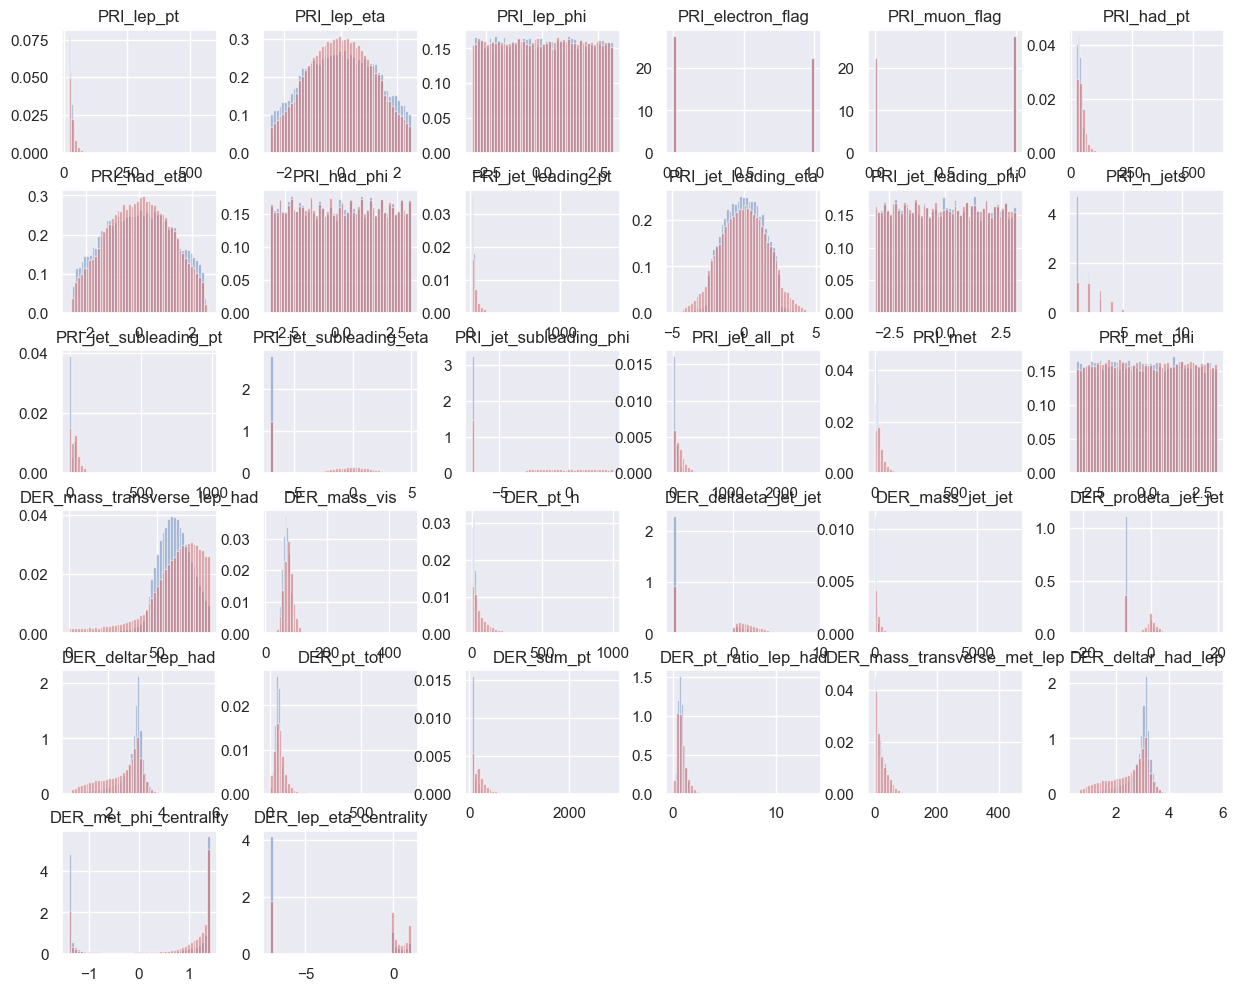

In [37]:
Train_data_vis.histogram_dataset()

Signal feature  correlation matrix


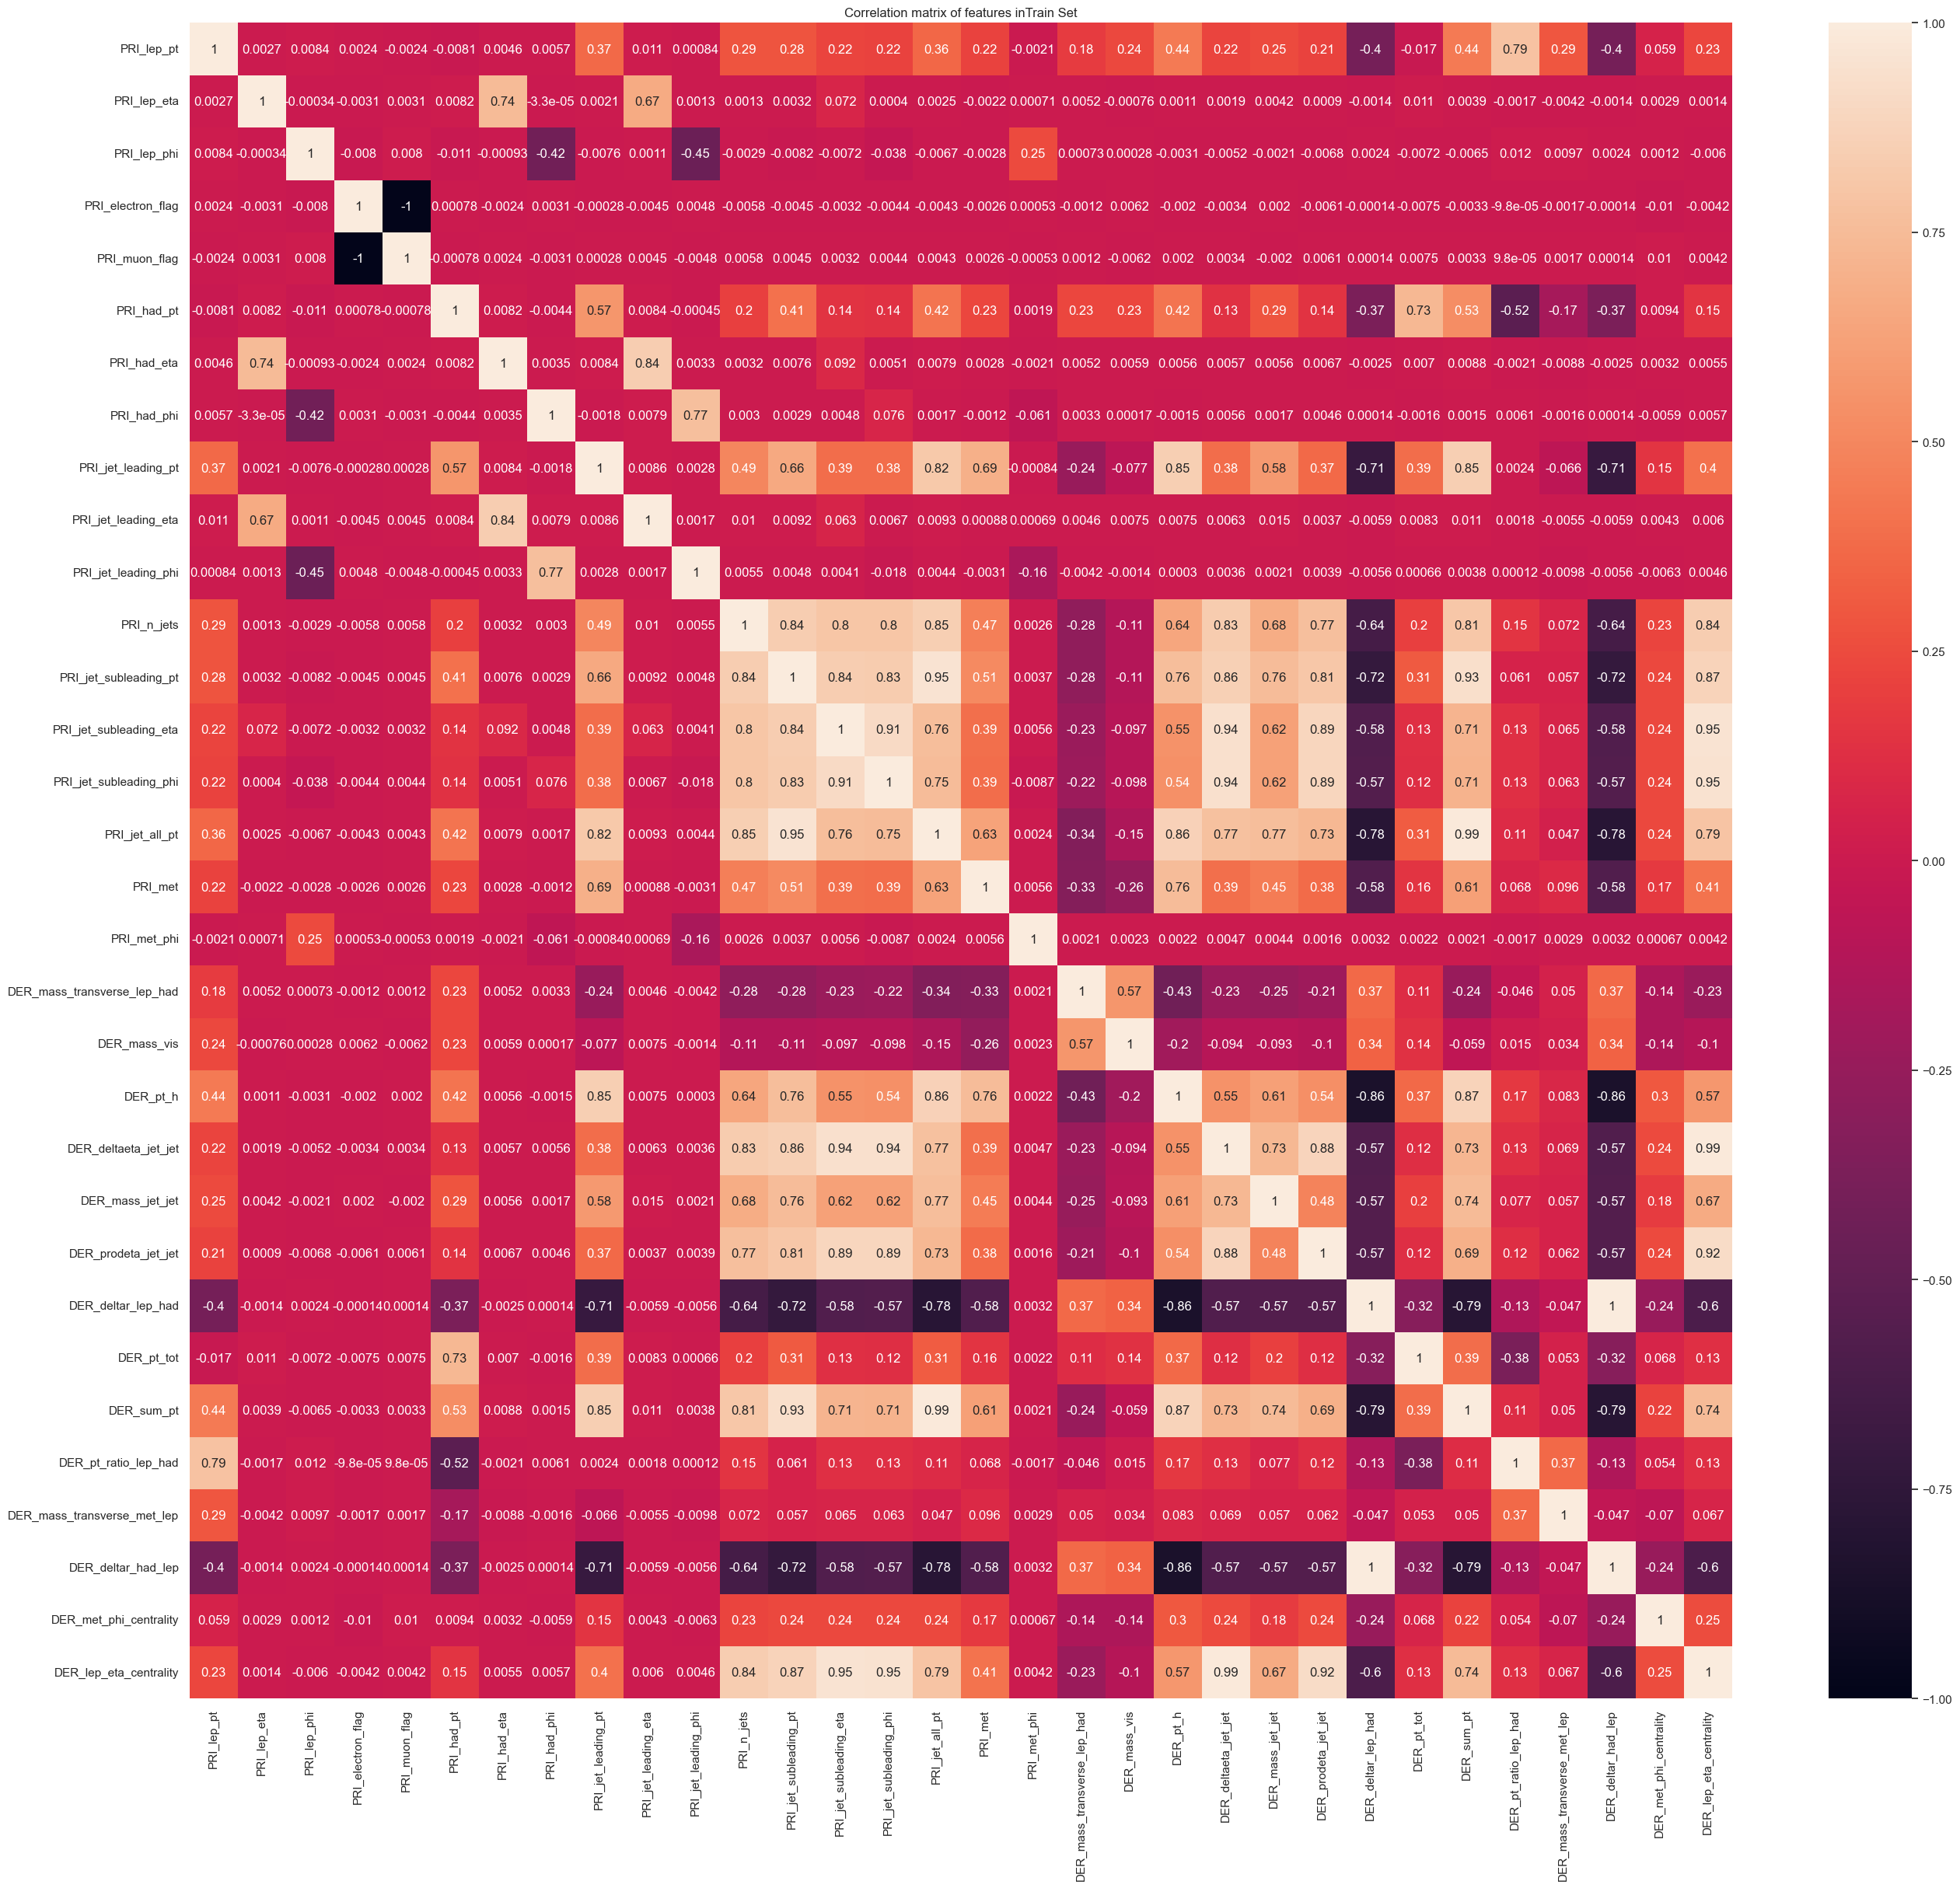

Background feature  correlation matrix


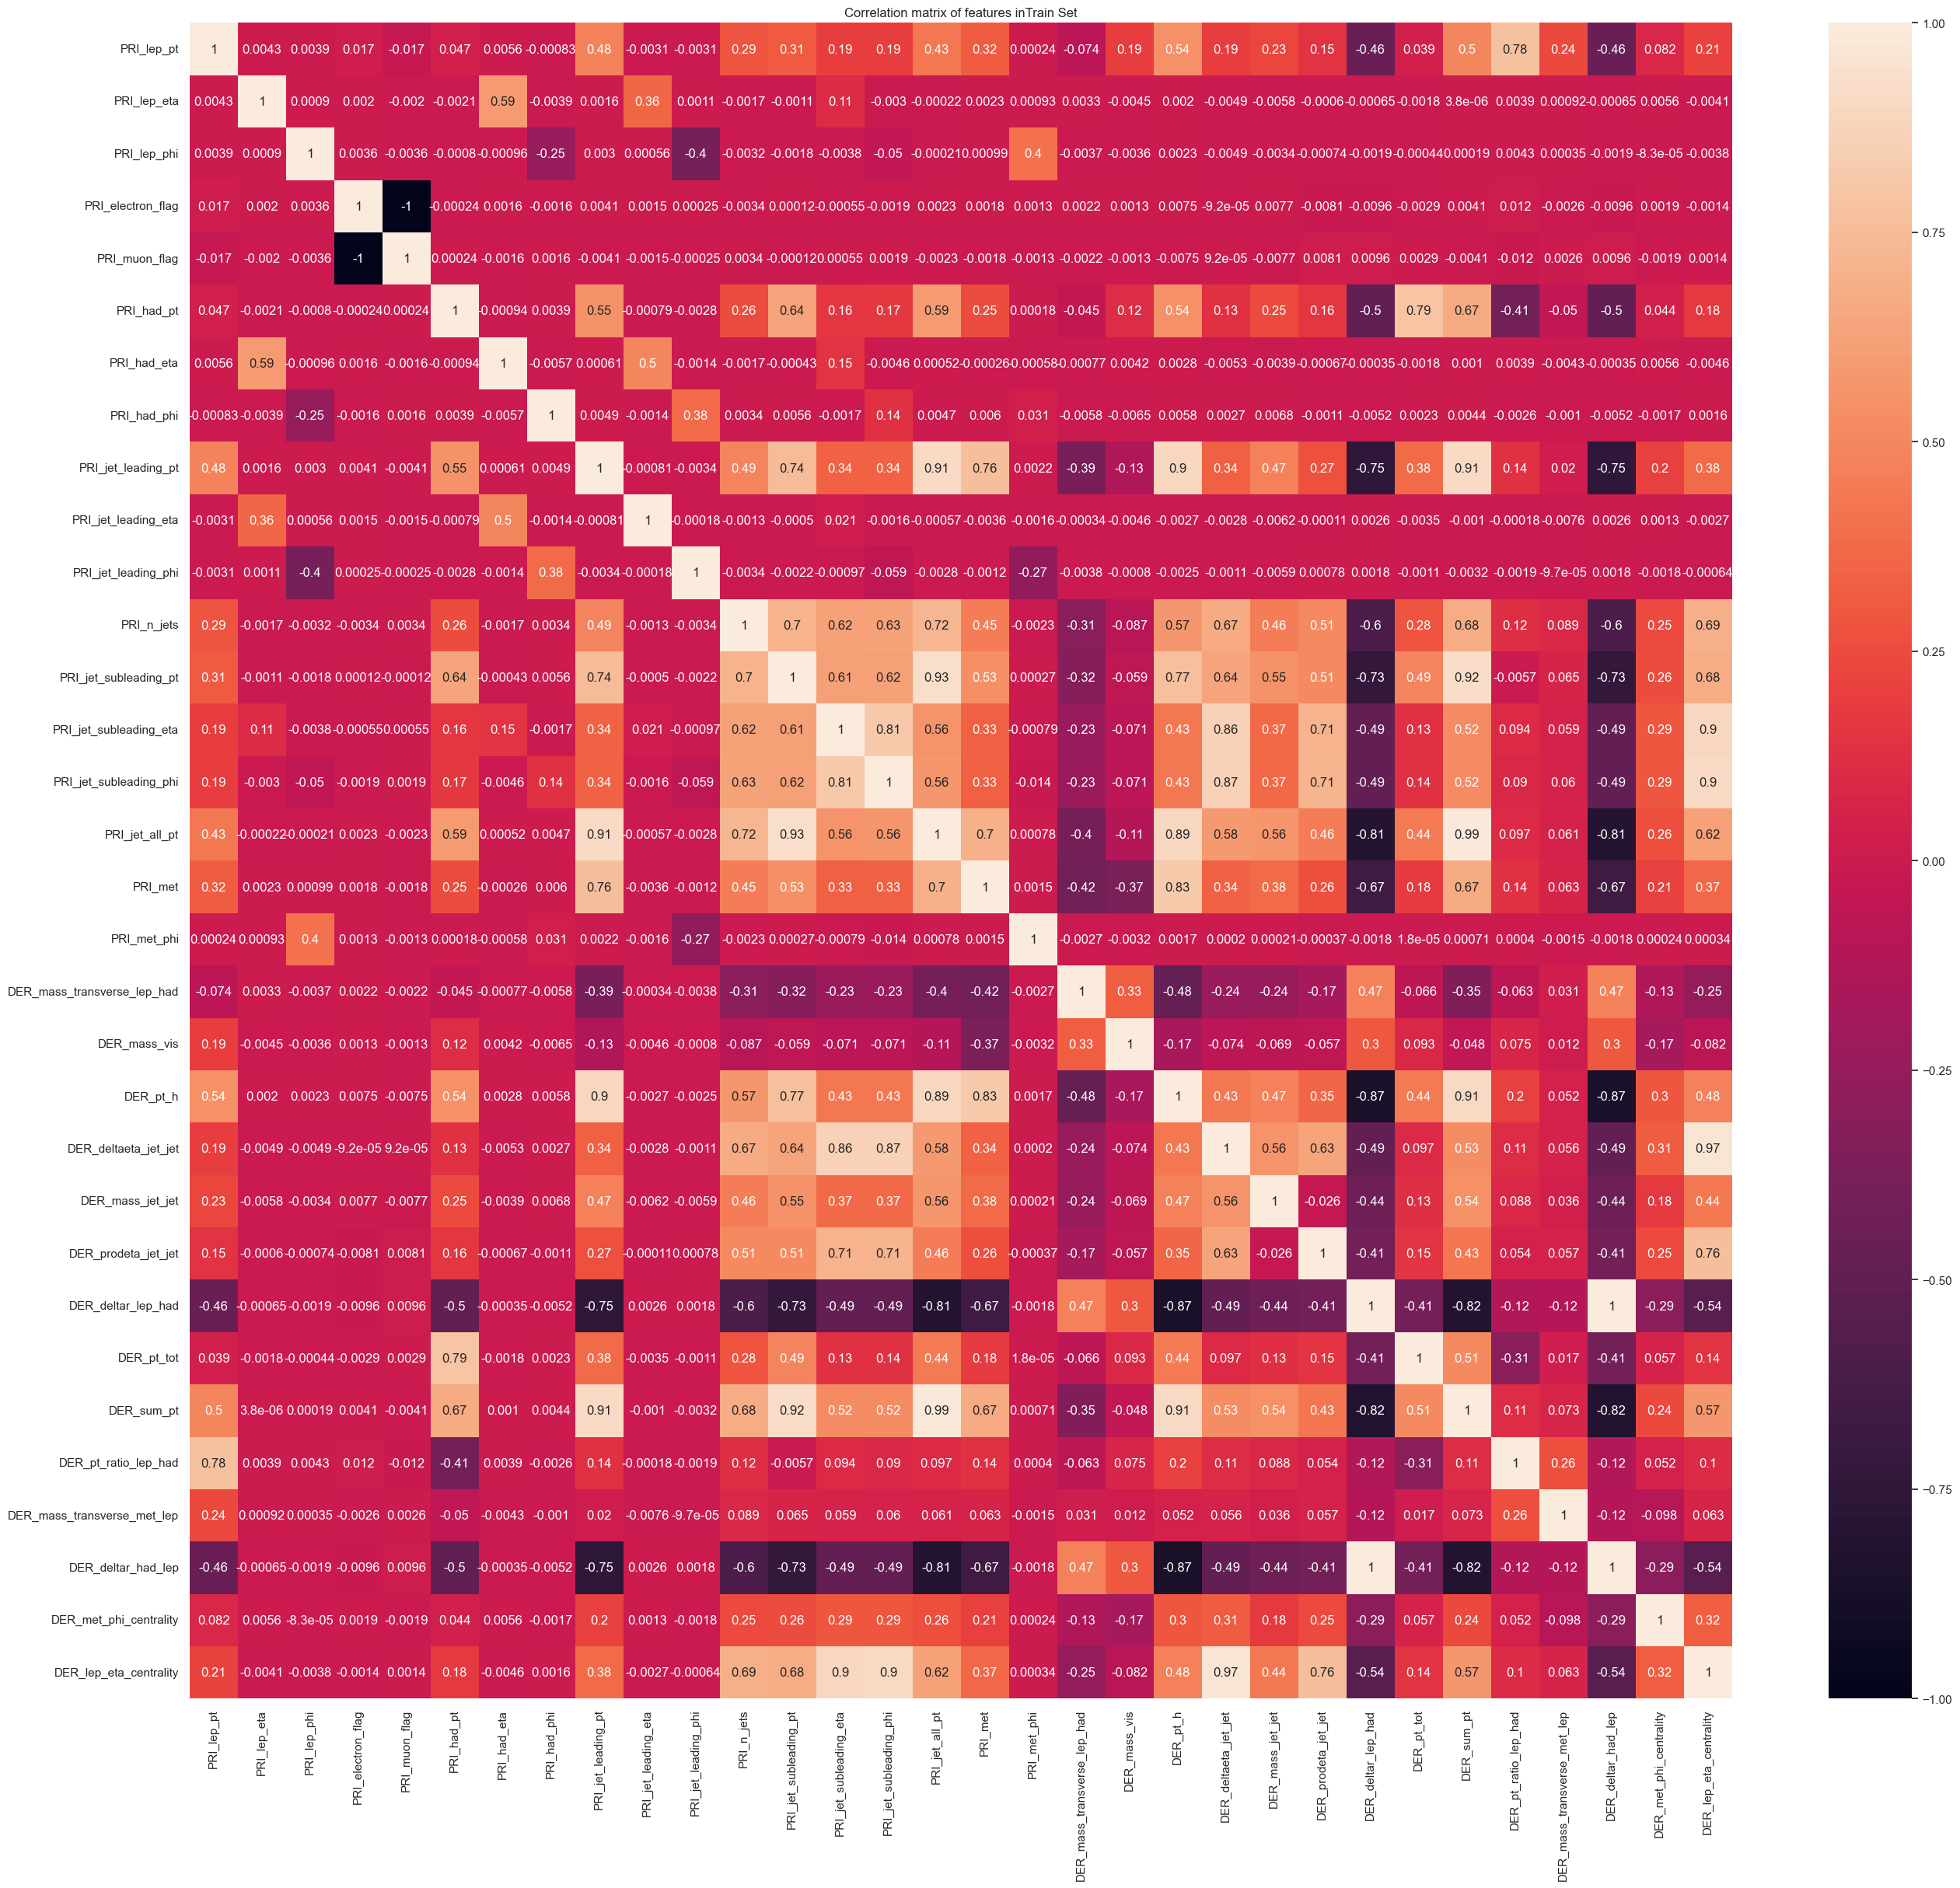

In [38]:
Train_data_vis.correlation_plots()

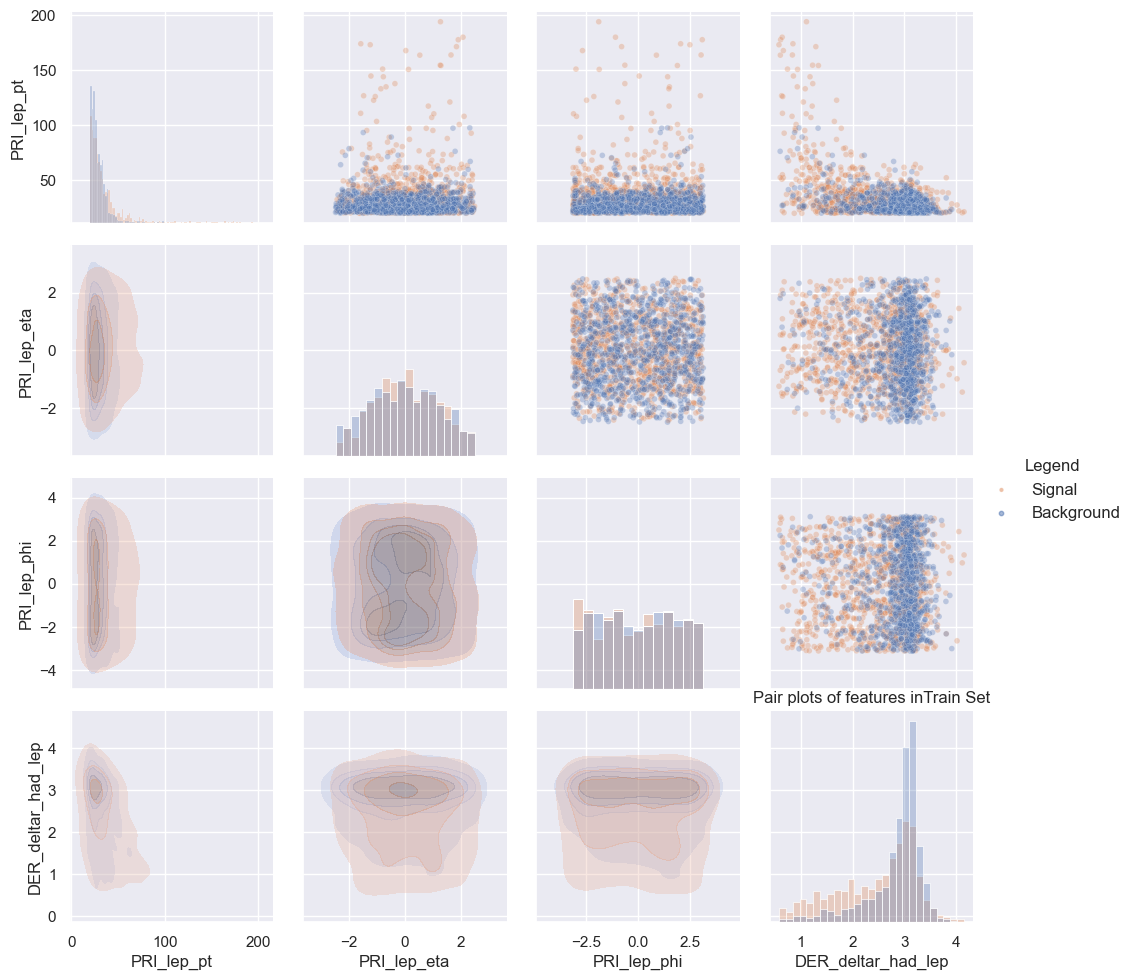

In [39]:
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [40]:
# Train_data_vis.cluster_plot(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])

In [41]:
# n = 1
# for i in range(n):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [42]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()


model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 0.91
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.810200001
sum of background 2860861.8102
[0]	validation_0-logloss:0.60412	validation_0-auc:0.83531	validation_1-logloss:0.61638	validation_1-auc:0.50012
[1]	validation_0-logloss:0.55602	validation_0-auc:0.84358	validation_1-logloss:0.60128	validation_1-auc:0.68373
[2]	validation_0-logloss:0.52821	validation_0-auc:0.84643	validation_1-logloss:0.61426	validation_1-auc:0.69256
[3]	validation_0-logloss:0.50950	validation_0-auc:0.84975	validation_1-logloss:0.64737	validation_1-auc:0.69751
[4]	validation_0-logloss:0.49761	validation_0-auc:0.85192	validation_1-logloss:0.65632	validation_1-auc:0.68150
[5]	validation_0-logloss:0.48908	validation_0-auc:0.85400	validation_1-logloss:0.65870	validation_1-auc:0.68395
[6]	validation_0-

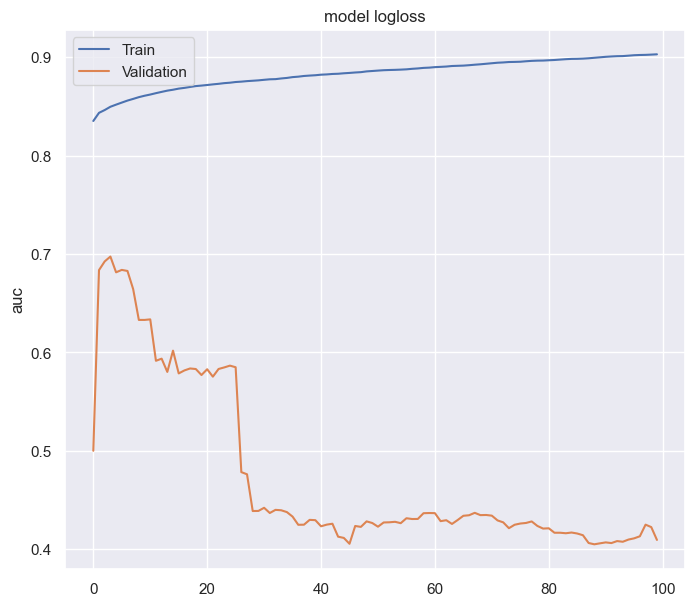

In [43]:
results = model.model.evals_result()

validationcurve(results,'auc')

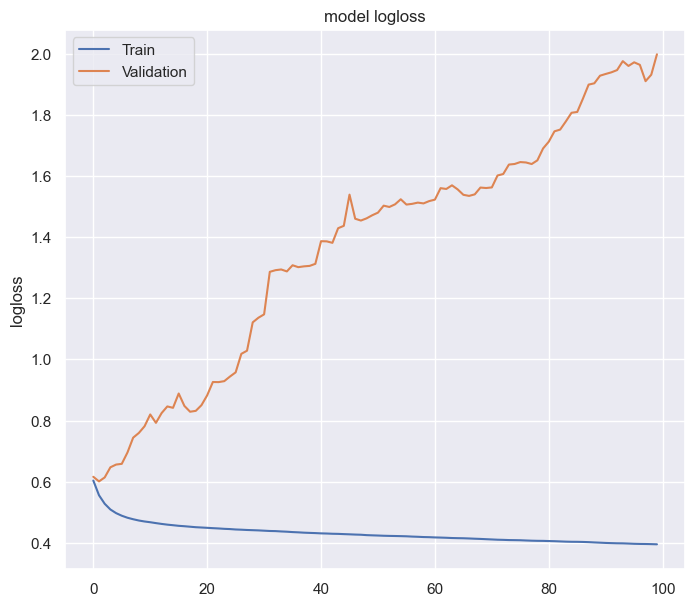

In [44]:
validationcurve(results,'logloss')

In [45]:
# lgb.plot_metric(results)

In [46]:
# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Calling predict method of submitted model
[*] - Testing


[*] - Computing Test result

[*] --- AUC test : 0.8605265988970734
[*] --- total weight test: 2871156.155424206
[*] --- total weight train: 2870527.8620537147
[*] --- total weight mu_cals_set: 2870527.862053714
[*] --- total test signal : 10294.345224205412
[*] --- total test background train: 2860861.810200001
[*] --- Significance : 17.20726059669817
[*] --- delta_mu_stat : 0.05811500293032616
[*] --- mean N: 45239.9988 --- sigma N: 213.95439046338825
[*] --- signal: 3430.6802385192823 --- background: 26800.61418379408
[*] --- signal test: 3660.1281411135164 --- background test: 41584.717271422254 --- N_roi 45239.9988

[*] --- mu hat test :5.374847940991596 + 5.437212946060018 - 5.312482935923174

[*] --- AUC test : 0.8657903468024503
[*] --- total weight test: 2876327.493165942
[*] --- total weight train: 2870527.8620537147
[*] --- total weight mu_cals_set: 2870527.862053714
[*] --- total test signal : 15465.682965942407
[*] --- total test background train: 2860861.8101999997
[*] ---

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

## Visualise Model

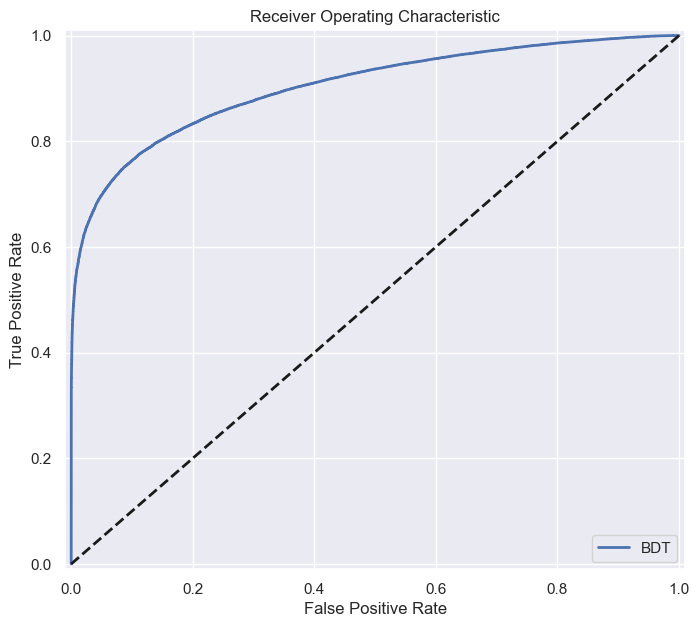

<Figure size 800x700 with 0 Axes>

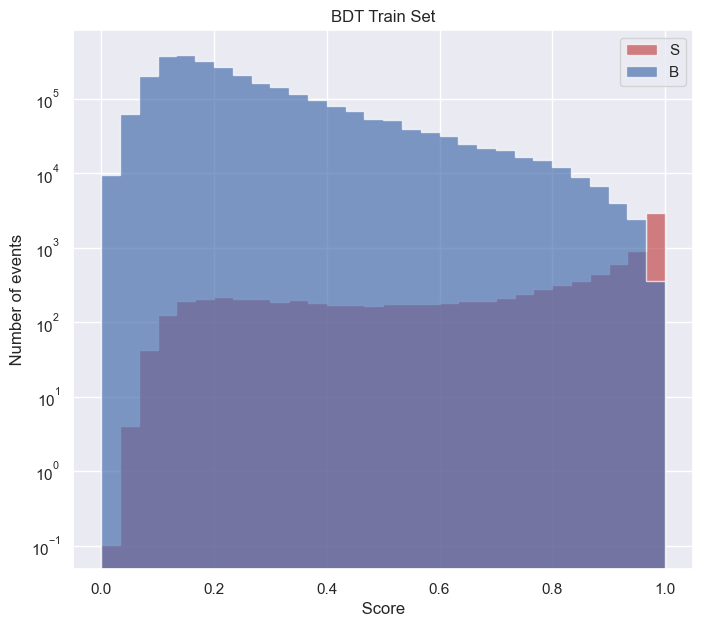

<Figure size 800x700 with 0 Axes>

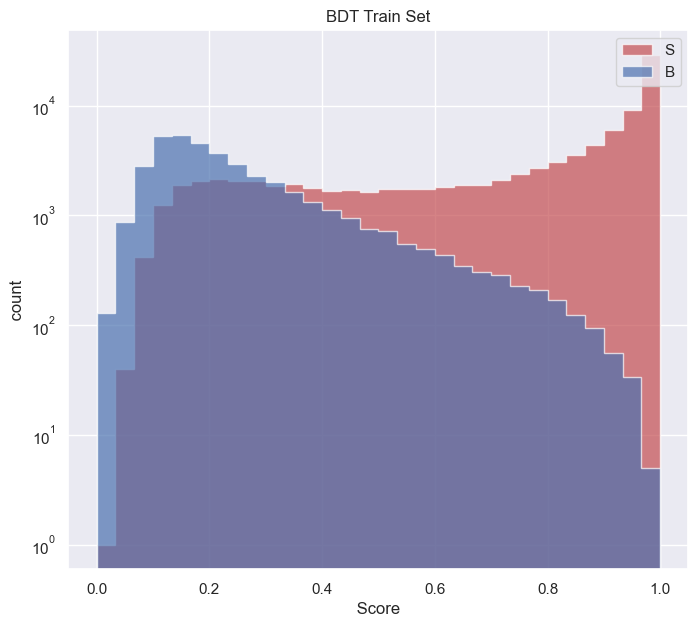

In [ ]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


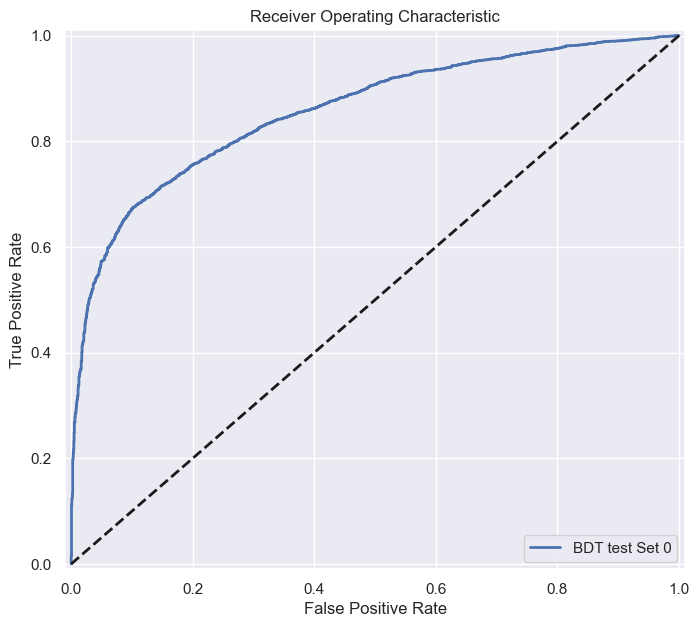

<Figure size 800x700 with 0 Axes>

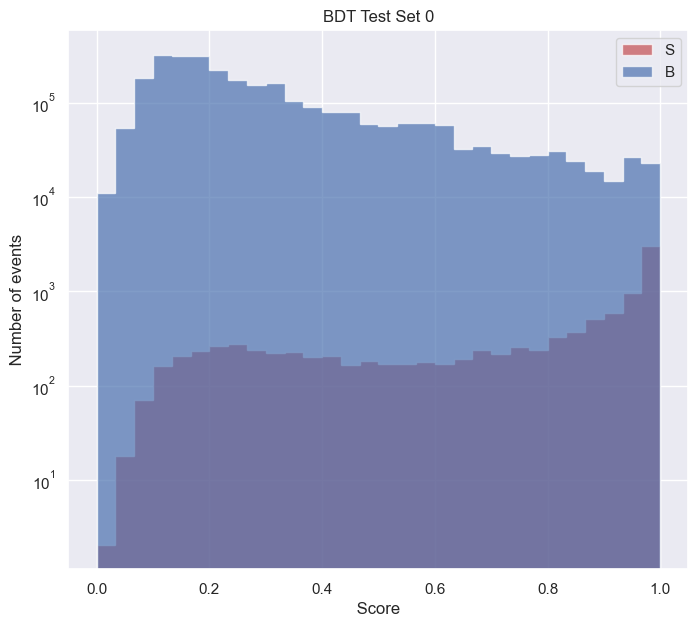

<Figure size 800x700 with 0 Axes>

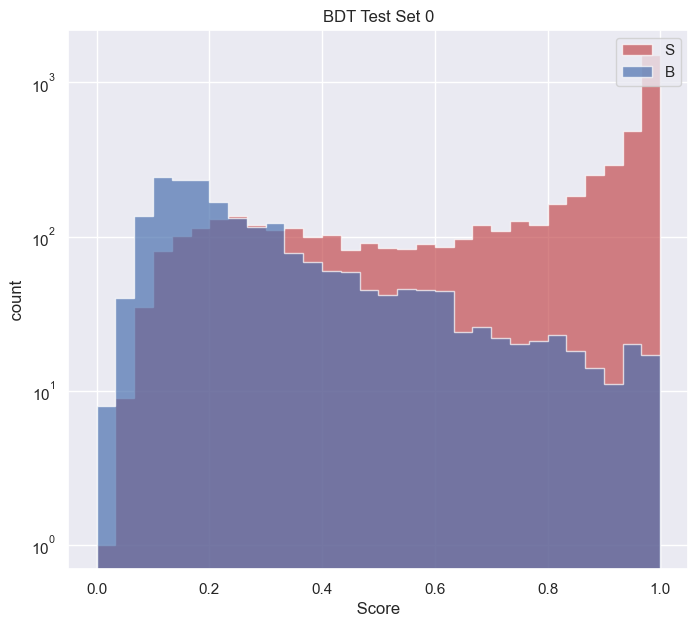

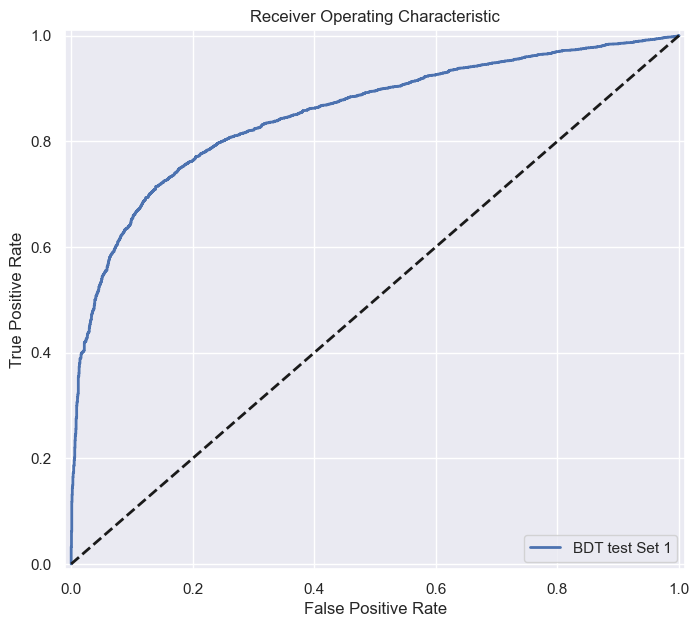

<Figure size 800x700 with 0 Axes>

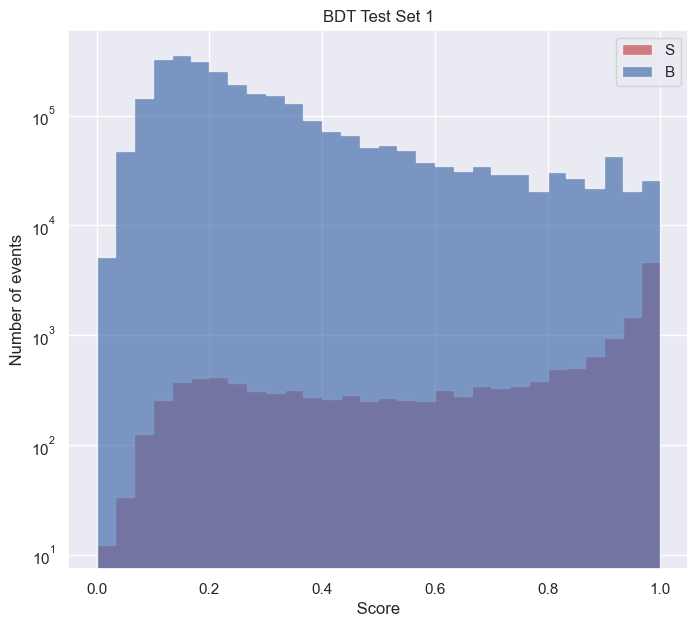

<Figure size 800x700 with 0 Axes>

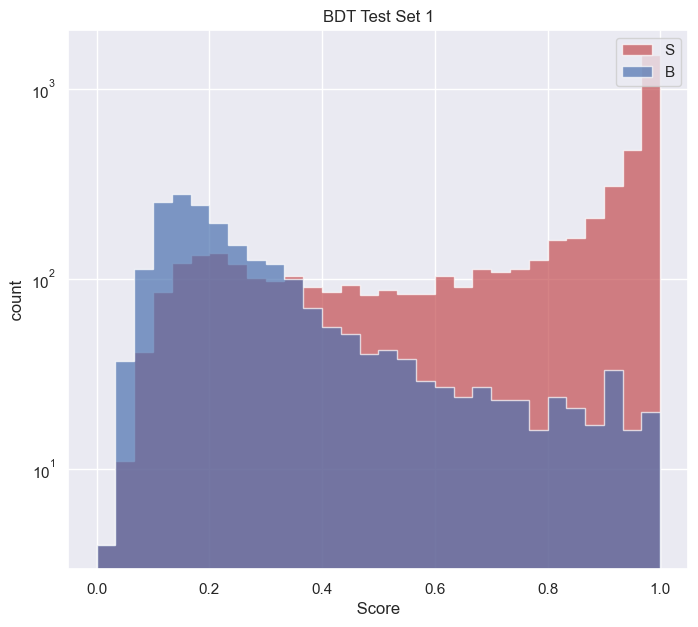

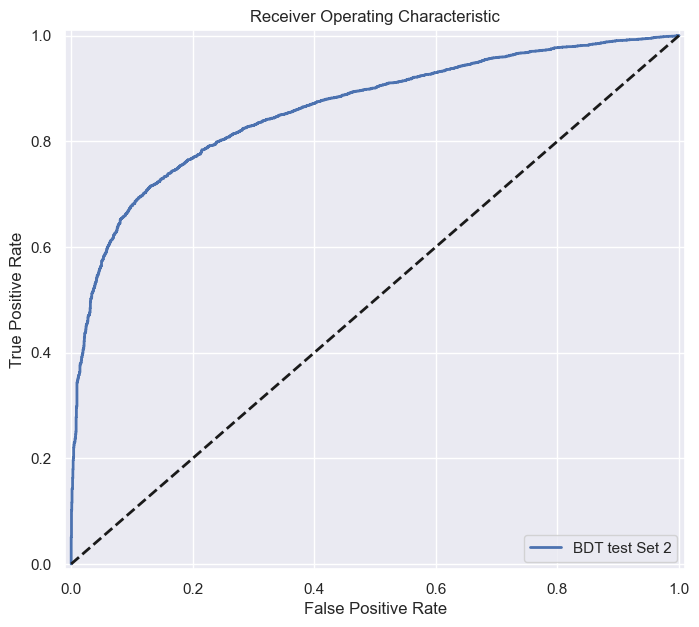

<Figure size 800x700 with 0 Axes>

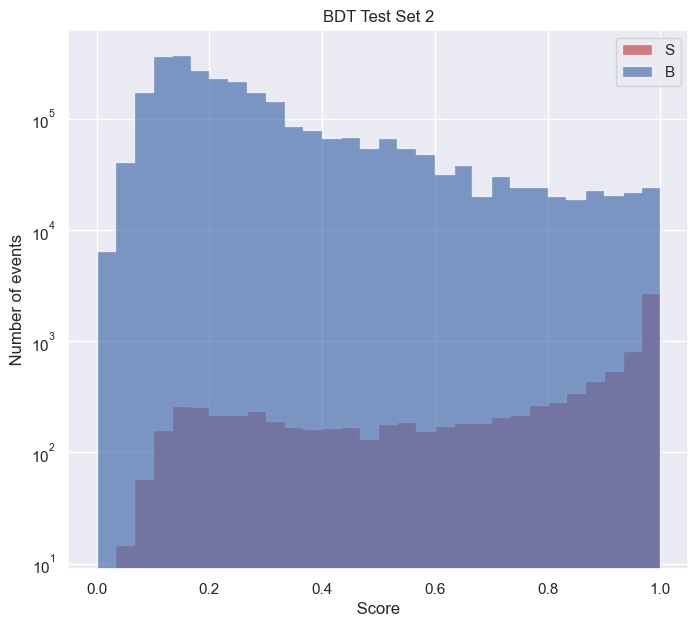

<Figure size 800x700 with 0 Axes>

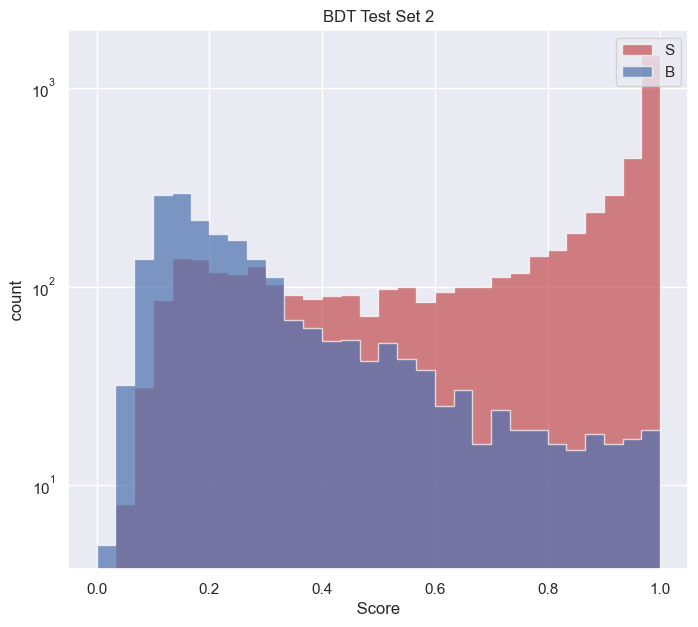

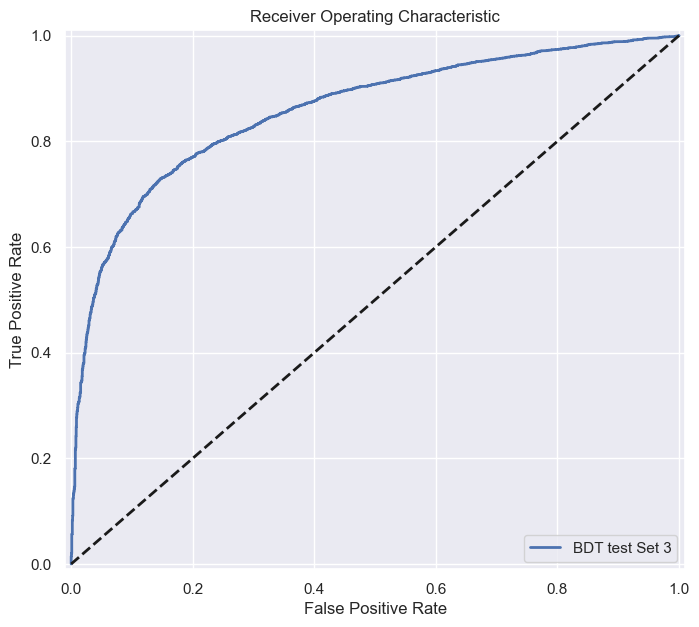

<Figure size 800x700 with 0 Axes>

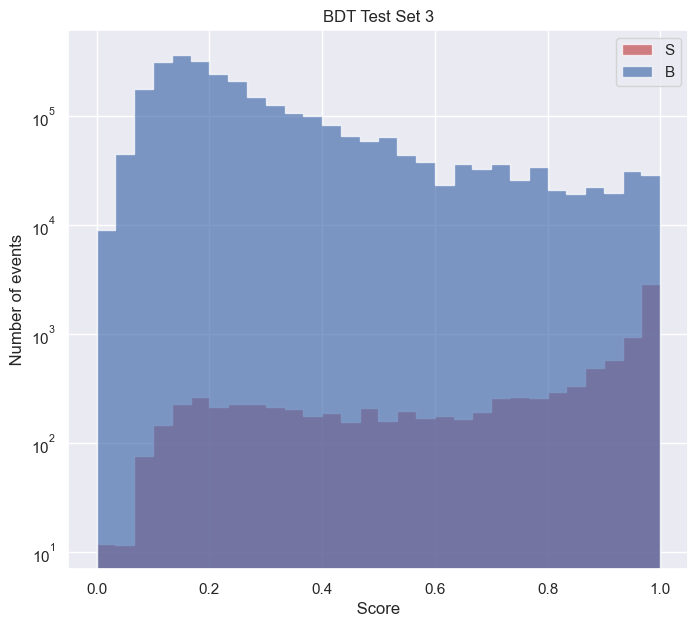

<Figure size 800x700 with 0 Axes>

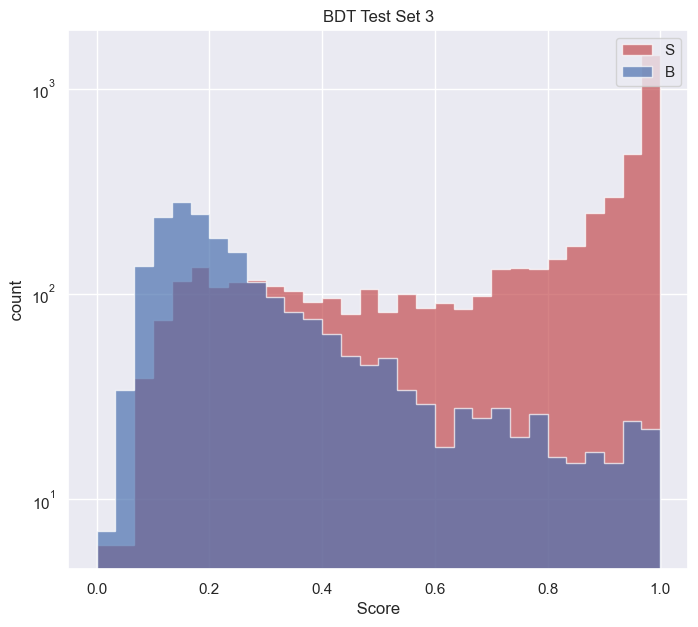

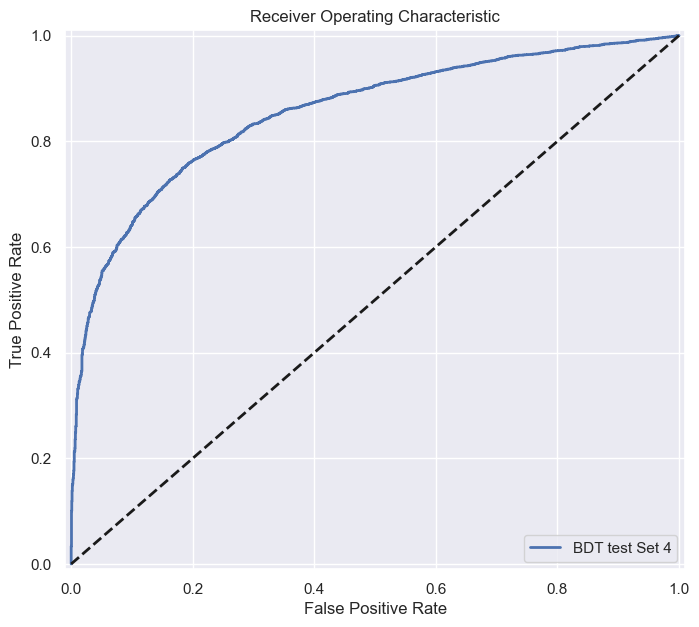

<Figure size 800x700 with 0 Axes>

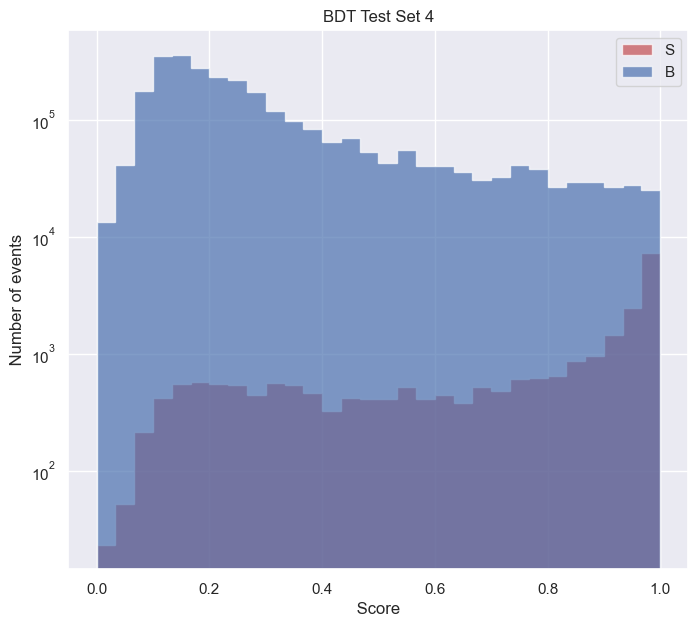

<Figure size 800x700 with 0 Axes>

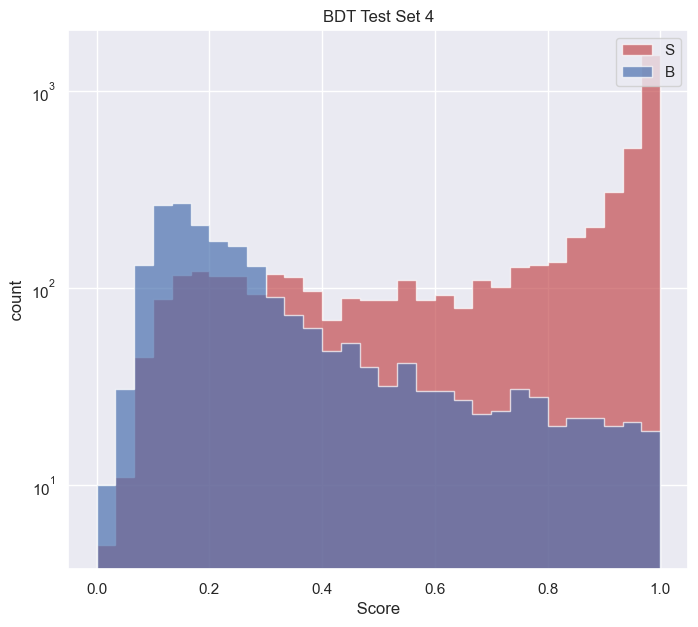

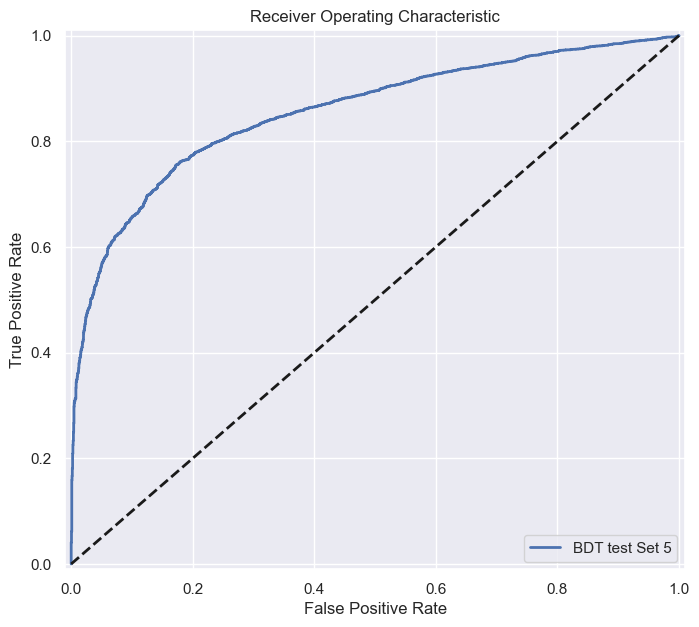

<Figure size 800x700 with 0 Axes>

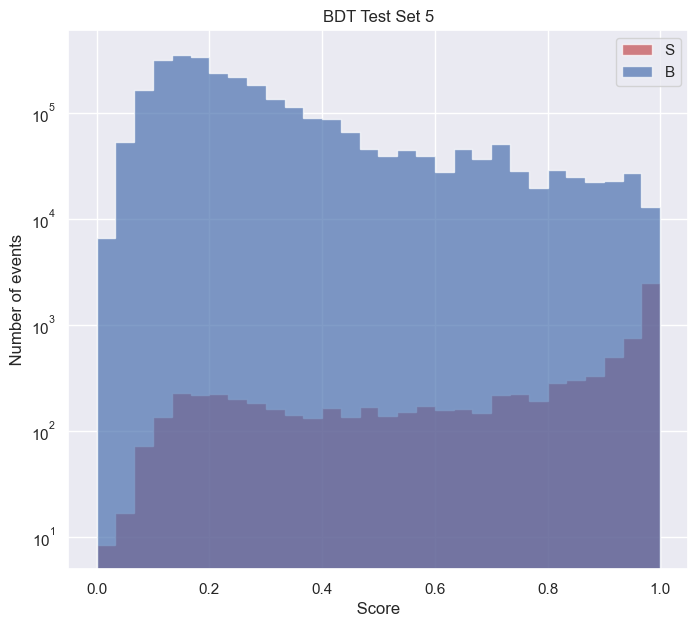

<Figure size 800x700 with 0 Axes>

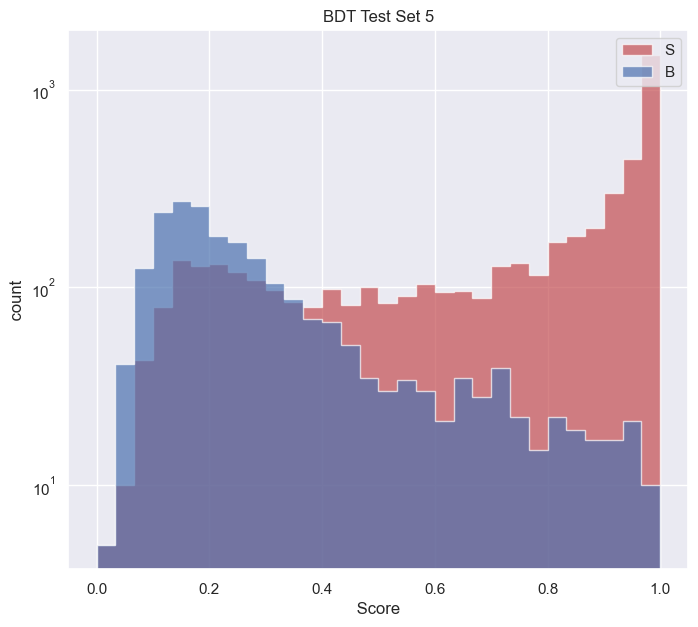

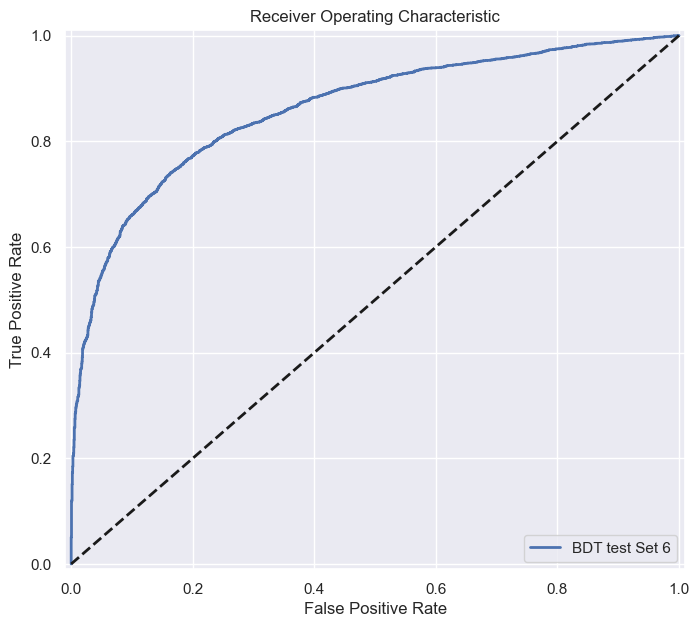

<Figure size 800x700 with 0 Axes>

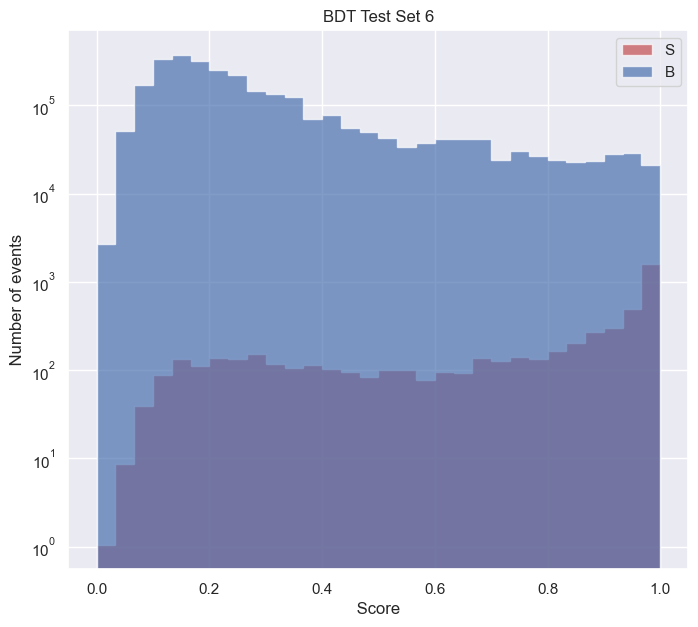

<Figure size 800x700 with 0 Axes>

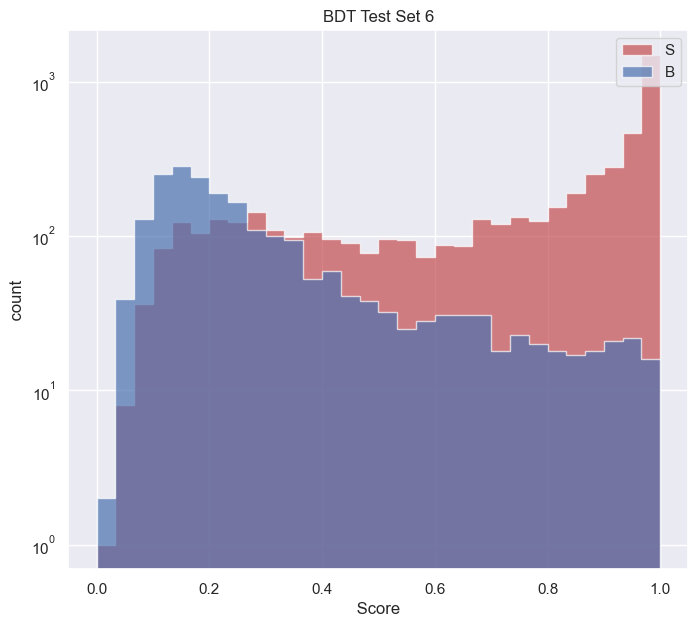

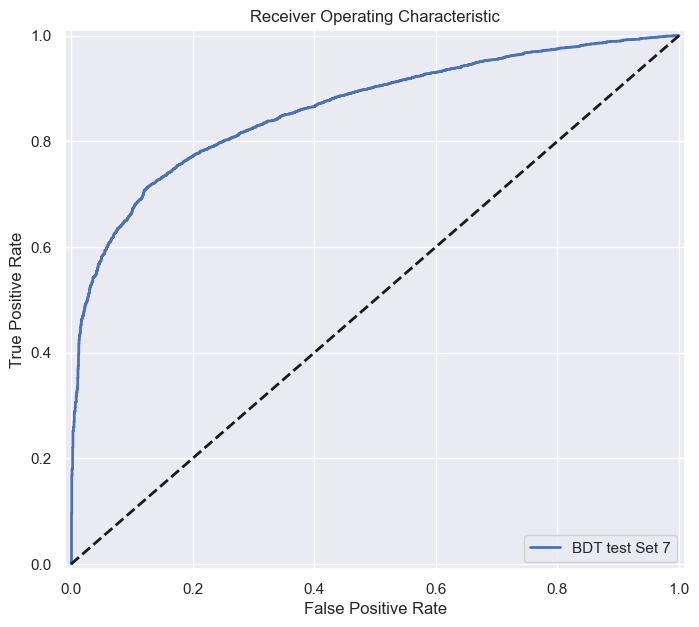

<Figure size 800x700 with 0 Axes>

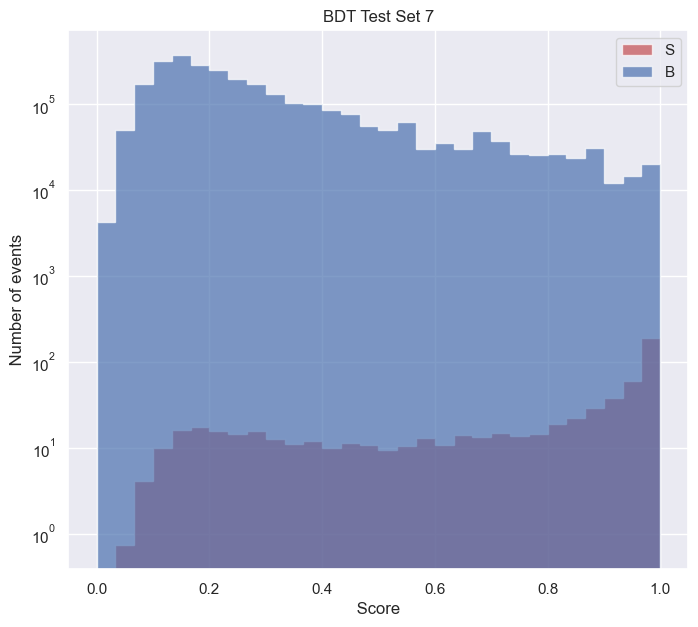

<Figure size 800x700 with 0 Axes>

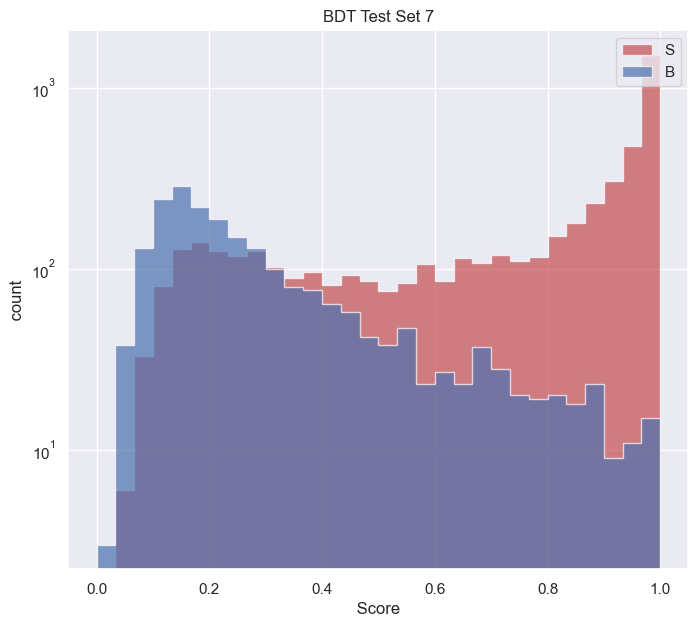

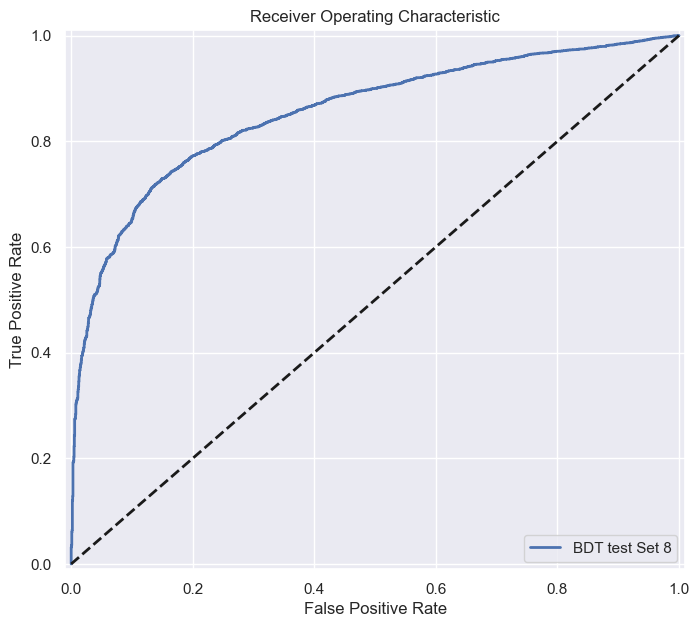

<Figure size 800x700 with 0 Axes>

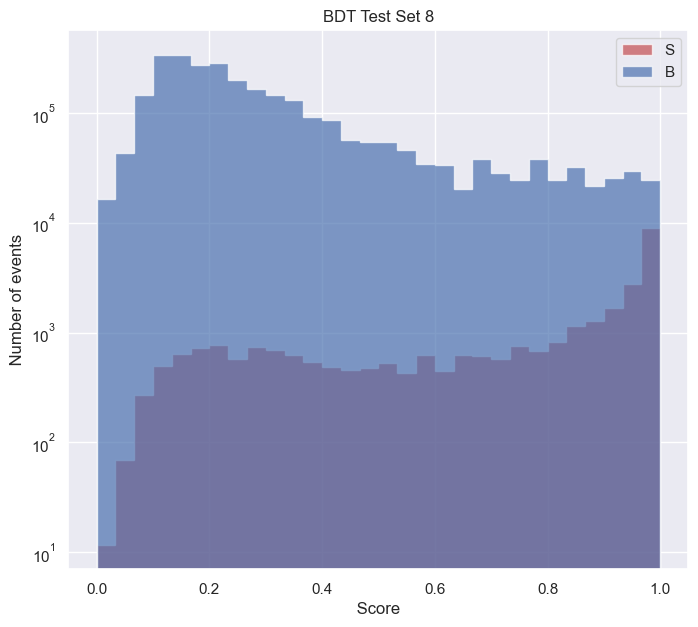

<Figure size 800x700 with 0 Axes>

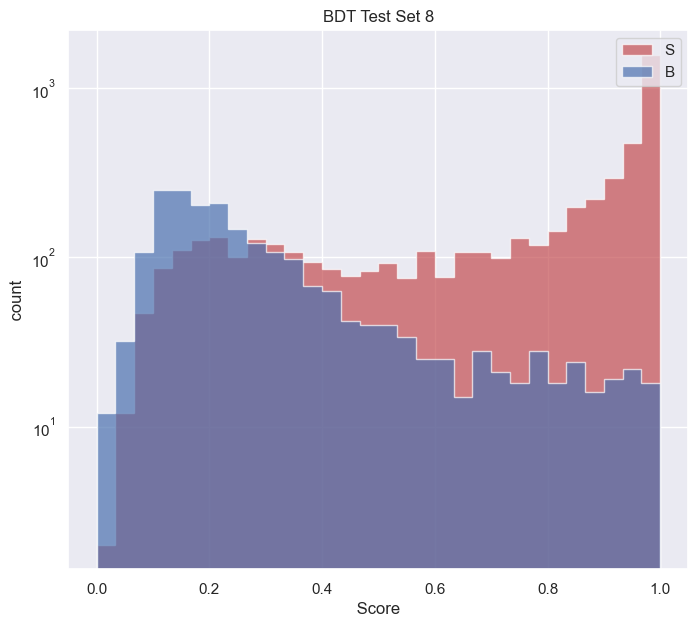

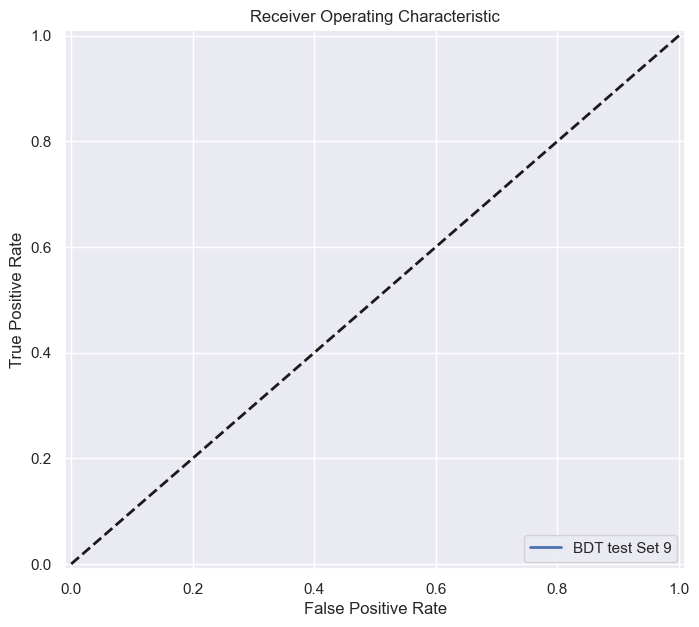

<Figure size 800x700 with 0 Axes>

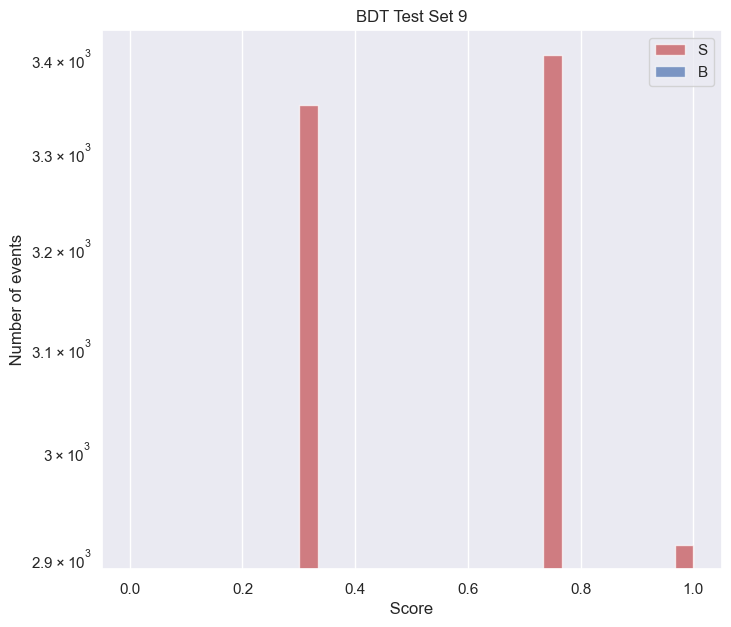

<Figure size 800x700 with 0 Axes>

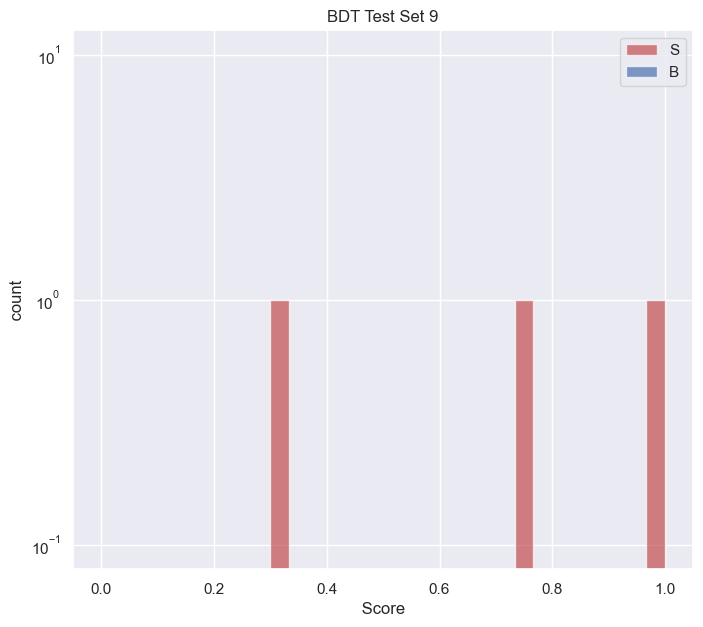

In [ ]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

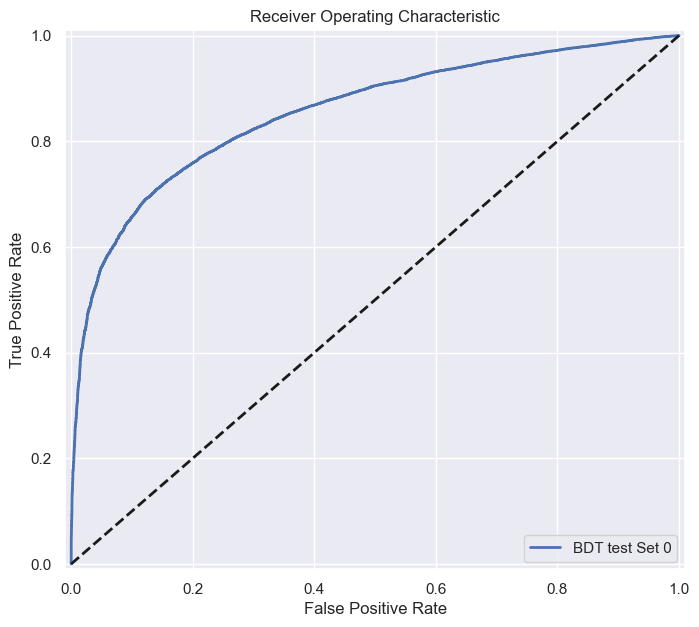

<Figure size 800x700 with 0 Axes>

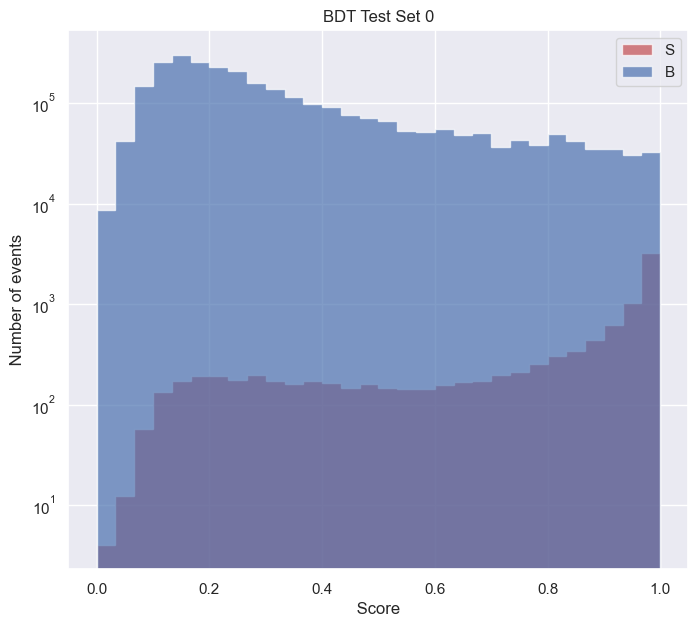

<Figure size 800x700 with 0 Axes>

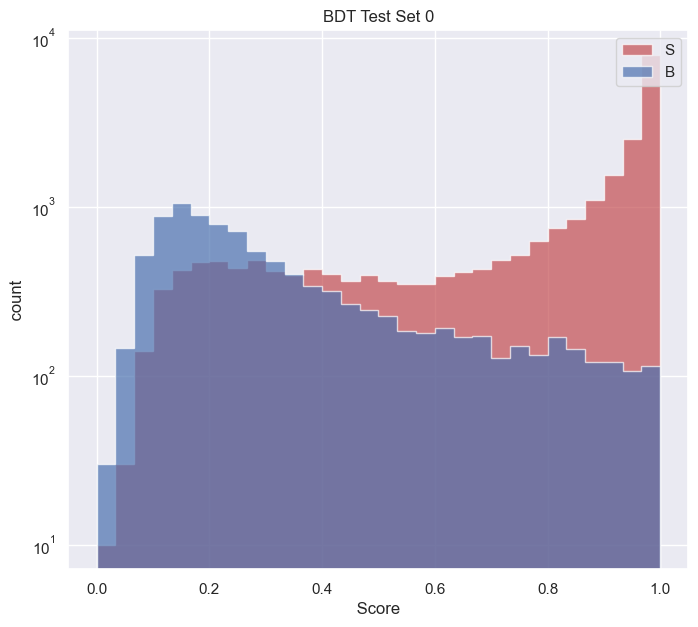

In [ ]:
i = 0
for valid_set in model.validation_sets:
    roc_curve_(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(valid_set['score'],valid_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [ ]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result


AttributeError: 'Ingestion' object has no attribute 'delta_mu_hat'

## End